In [0]:
!git clone https://github.com/dtylor/WalkRNN.git
%cd WalkRNN
!ls

Cloning into 'WalkRNN'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 448 (delta 59), reused 41 (delta 12), pack-reused 326
Receiving objects: 100% (448/448), 4.73 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (239/239), done.
/content/WalkRNN
Demonstration.ipynb  LICENSE-3RD-PARTY.txt  MUTAG.ipynb     test.py
examples	     LICENSE.md		    n2v		    TODO
graphwave	     module.py		    OrgChart.ipynb  utilities.py
__init__.py	     Motivation.ipynb	    README.md


In [0]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0    786      0 --:--:-- --:--:-- --:--:--   786
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
import fastai
import pandas as pd

In [0]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.2.0
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7602 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run t

In [0]:
str(fastai.__dict__['version'])
!more /usr/local/lib/python3.6/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.57'


In [0]:
!ls

Demonstration.ipynb  LICENSE-3RD-PARTY.txt  MUTAG.ipynb     test.py
examples	     LICENSE.md		    n2v		    TODO
graphwave	     module.py		    OrgChart.ipynb  utilities.py
__init__.py	     Motivation.ipynb	    README.md


In [0]:
from google.colab import drive

In [0]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels, transform_graph


Gkern = load_graph_kernel_graph("./examples/data/NCI1")
y = load_graph_kernel_labels("./examples/data/NCI1")


DONE


In [0]:
Gkern.nodes[12]

{'component': 1, 'label_0': 3}

In [0]:
#Transform networkx property graph into a format prepared for WalkRNN
G, current_vocab_size = transform_graph(Gkern, params={'num_kmeans_clusters': 5, "num_pca_components": 6, "num_batch":500, 'num_att_kmeans_clusters': 10})

finished graphwave_alg batches


In [0]:
G.nodes[12]

{'component': 1, 'label_0': 7, 'structure': 4}

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=5)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

21


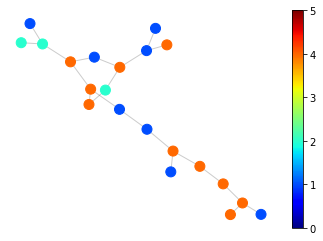

{1: 2, 2: 1, 3: 1, 4: 4, 5: 4, 6: 1, 7: 1, 8: 2, 9: 4, 10: 1, 11: 4, 12: 4, 13: 4, 14: 1, 15: 4, 16: 2, 17: 4, 18: 4, 19: 1, 20: 4, 21: 1}


In [0]:

plotGW(G,1)

24


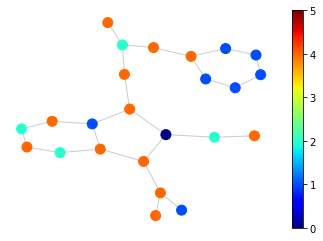

{22: 4, 23: 2, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 0, 30: 1, 31: 4, 32: 4, 33: 2, 34: 4, 35: 2, 36: 4, 37: 1, 38: 4, 39: 2, 40: 4, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1}


In [0]:
plotGW(G,2)

29


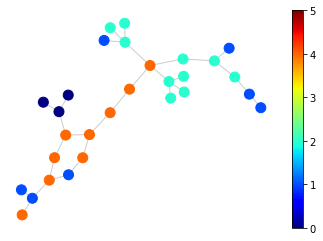

{46: 2, 47: 2, 48: 2, 49: 2, 50: 1, 51: 2, 52: 2, 53: 1, 54: 0, 55: 0, 56: 1, 57: 4, 58: 4, 59: 2, 60: 4, 61: 0, 62: 1, 63: 4, 64: 2, 65: 2, 66: 4, 67: 2, 68: 4, 69: 4, 70: 4, 71: 1, 72: 4, 73: 1, 74: 1}


In [0]:
plotGW(G,3)

29


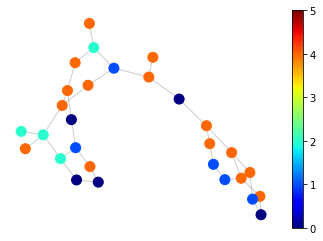

{3803: 4, 3804: 2, 3805: 0, 3806: 4, 3807: 2, 3808: 4, 3809: 2, 3810: 4, 3811: 0, 3812: 0, 3813: 4, 3814: 4, 3815: 4, 3816: 1, 3817: 1, 3818: 4, 3819: 0, 3820: 2, 3821: 4, 3822: 0, 3823: 4, 3824: 4, 3825: 4, 3826: 4, 3827: 1, 3828: 4, 3829: 1, 3830: 4, 3831: 1}


In [0]:
plotGW(G,151)

28


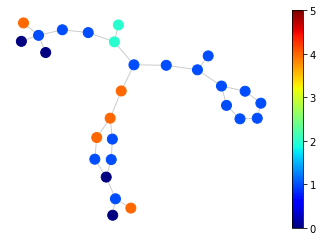

{227: 2, 228: 1, 229: 4, 230: 0, 231: 1, 232: 1, 233: 1, 234: 1, 235: 1, 236: 0, 237: 0, 238: 4, 239: 2, 240: 1, 241: 4, 242: 4, 243: 1, 244: 4, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 1, 251: 1, 252: 1, 253: 1, 254: 1}


In [0]:
plotGW(G,11)

40


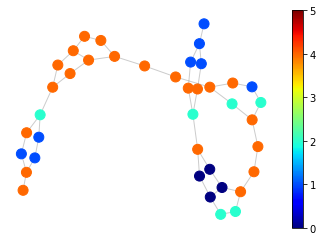

{4100: 1, 4101: 4, 4102: 0, 4103: 4, 4104: 4, 4105: 4, 4106: 0, 4107: 4, 4108: 0, 4109: 4, 4110: 2, 4111: 4, 4112: 2, 4113: 4, 4114: 4, 4115: 4, 4116: 4, 4117: 4, 4118: 0, 4119: 4, 4120: 4, 4121: 4, 4122: 4, 4123: 4, 4124: 2, 4125: 2, 4126: 2, 4127: 2, 4128: 4, 4129: 1, 4130: 4, 4131: 4, 4132: 4, 4133: 1, 4134: 1, 4135: 1, 4136: 1, 4137: 1, 4138: 1, 4139: 4}


In [0]:
plotGW(G,160)

31


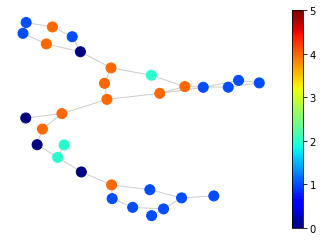

{384: 4, 385: 4, 386: 1, 387: 1, 388: 1, 389: 1, 390: 1, 391: 4, 392: 1, 393: 1, 394: 1, 395: 1, 396: 4, 397: 2, 398: 1, 368: 2, 369: 0, 370: 2, 371: 4, 372: 0, 373: 0, 374: 4, 375: 4, 376: 4, 377: 4, 378: 4, 379: 0, 380: 1, 381: 1, 382: 1, 383: 1}


In [0]:
plotGW(G,18)

25


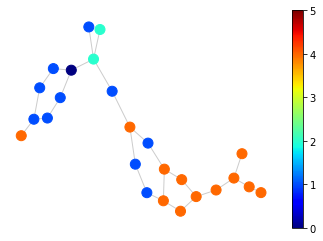

{3504: 4, 3505: 2, 3506: 2, 3507: 1, 3508: 4, 3509: 4, 3510: 1, 3511: 4, 3512: 4, 3513: 4, 3514: 4, 3515: 4, 3516: 4, 3517: 1, 3518: 1, 3519: 1, 3520: 0, 3521: 4, 3522: 1, 3523: 1, 3524: 1, 3525: 1, 3526: 1, 3527: 4, 3528: 4}


In [0]:
plotGW(G,140)

In [0]:
from module import walk_as_string

In [0]:
walks = walk_as_string(G, componentLabels = y)

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/content/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[ 1  8  2  8  1  8  2  8  2  8  2  8  2  8 12 11 12 14 12 14 12  8  2  8  1  8  1  8  2  8]
[ 1  8  2  8 12 14 12 11 12  8 12 11 13 16 13 16 13 16 15 14 12  8  2  8  2  8  2  8  2  8]
[ 1  8  1  8  2  8 12  8  2  8  2  8  1  8  1  8  1  8 12  8  1  8  1  8 12 14 15 14 15 10]


In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [0]:
walks.head()

,walk,label,start_node,component
0,2 5 2 6 1 5 2 6 2 5 2 6 1 5 2 6 1 5 2...,0,1,1
1,2 5 2 6 1 5 2 6 4 7 1 7 4 7 4 7 4 7 2...,0,1,1
2,2 5 2 6 2 5 2 6 1 5 2 6 4 7 2 6 1 5 2...,0,1,1
3,2 5 2 6 1 5 2 6 1 5 2 6 1 5 2 6 1 5 2...,0,1,1
4,2 5 2 6 4 7 2 6 1 5 2 6 4 7 1 7 4 7 1...,0,1,1


In [0]:
walks.shape

(2446380, 4)

In [0]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [0]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(1767760, 4)

In [0]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(250040, 4)

In [0]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(428580, 4)

In [0]:
!mkdir result
mypath = './result'

In [0]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [0]:
data_lm.save('data_lm.pkl')

In [0]:
!ls -l ./result

total 1426856
-rw-r--r-- 1 root root 1461094847 Oct  1 16:01 data_lm.pkl


In [0]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm.pkl', bs=bs)


In [0]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,4 7 1 7 4 7 4 7 4 7 2 6 4 7 4 7 4 7 2 7 4 7 2 7 4 7 2 7 4 7 1 7 4 7 2 6 1 5 2 6 1 5 2 6 1 5 2 6 1 5 2 6 xxbos 2 5 2 6 2 5 2 6 1 5 2 6 4 7 2 6 1
1,2 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 2 7 1 7 1 7 xxbos 0 7 0 6 0 7 0 6 0 7 0 6 0 7 0 6 2 5 0 7 0 5 0 7 0 6 4 7 2 7 4 7 0 6 0 7 0 5 0 7 0 5 0 7 0 6 0
2,0 5 1 7 0 5 0 7 0 5 1 7 0 7 0 6 0 7 2 7 2 7 2 7 2 7 2 7 1 7 2 7 2 7 2 6 2 7 0 7 0 5 0 7 0 5 0 7 0 5 0 7 xxbos 0 5 1 7 0 7 0 6 0 7 2 7 0 7 0 6 0
3,4 7 4 7 2 7 4 7 4 7 4 7 4 7 4 7 4 7 4 7 4 7 xxbos 2 7 0 7 2 7 4 6 4 7 4 7 4 7 4 7 4 7 2 7 4 7 4 7 4 7 2 7 4 7 4 7 4 7 4 7 4 7 4 7 4 7 4 7 4 7 0
4,1 7 1 6 1 7 1 7 1 7 1 7 1 7 2 7 2 8 4 7 1 7 4 7 2 8 2 7 2 8 4 7 1 7 1 7 1 6 1 7 1 6 1 7 4 7 4 6 4 7 1 7 xxbos 2 6 4 7 1 7 1 6 1 7 1 7 1 7 1 7 4


In [0]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.663847,0.631495,0.759204,27:10


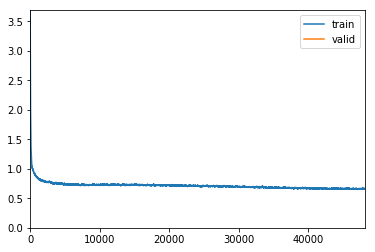

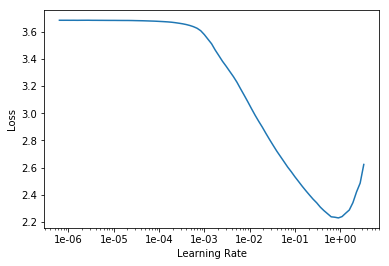

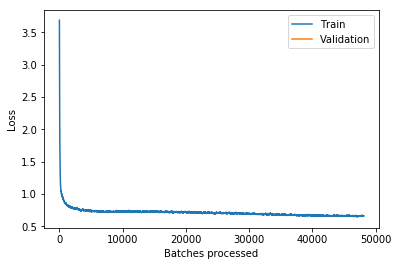

In [0]:

learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


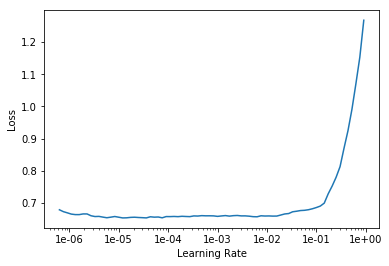

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, .01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [0]:
learn.save('fit-head')

In [0]:
learn.save_encoder('fine_tuned_enc3')

In [0]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


Choose a path per node and concatenate for entire component

In [0]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

In [0]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

In [0]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

In [0]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [0]:
data_clas.save('tmp_clas')

In [0]:
data_clas = load_data(mypath, 'tmp_clas', bs=bs)


In [0]:
data_clas.show_batch()

In [0]:
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [0]:
gc.collect();

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

In [0]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [0]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-03), moms=(0.8,0.7))



In [0]:
predict(test,learn)

In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
predict(test,learn)

In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
predict(test,learn)

In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
predict(test,learn)

In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
predict(test,learn)

In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
predict(test,learn)

In [0]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
predict(test,learn)

In [0]:
learn.model